In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plx
from pathlib import Path
from random import random
from datetime import timedelta, datetime

from sec import *
from stooq import *

import json
from tqdm.notebook import tqdm

from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# Altere estas variáveis caso os arquivos não tenham sido encontrados
stooq_dir = 'data/stooq'
fundamentals_dir = 'data/sec/companyfacts'
tickers_path = 'data/sec/company_tickers.json'

In [4]:
period = '5 min'
market = 'us'
sample_companies = [
    'MSFT.US',
    'AVGO.US',
    'NVDA.US',
    'TSM.US',
    'TSLA.US',
    'META.US',
    'IBM.US',
    'AAPL.US',
    'ASML.US',
    'AMZN.US',
    'GOOG.US',
    'LLY.US',
    'WMT.US',
    'JPM.US',
    'V.US',
    'UNH.US',
    'XOM.US',
    'ORCL.US',
    'MA.US'
]

In [5]:
cik_by_ticker = None
with open(tickers_path, 'r') as file:
    cik_by_ticker = json.load(file)
cik_by_ticker = { value['ticker'] + '.US': value['cik_str'] for _key, value in cik_by_ticker.items() }

In [6]:
final_table = pd.read_parquet('data/final_table.parquet')

In [7]:
#sample_table = final_table.dropna()

In [8]:
#sample_ciks = [cik_by_ticker[ticker] for ticker in ['AAPL.US']]
#sample_table = final_table[final_table.index.get_level_values('cik').isin(sample_ciks)].dropna()

In [9]:
sample_table = final_table.loc[cik_by_ticker['AAPL.US']].copy()

In [10]:
#sample_table['log_adj_ey_diff'] = sample_table['log_adj_ey_ms'] - sample_table['log_adj_ey_ms'].shift()
sample_table.dropna(inplace=True)

In [11]:
split_date = datetime(2021, 1, 1)
test_table = sample_table[sample_table.index.get_level_values(level='date') >= split_date].copy()
train_table = sample_table[sample_table.index.get_level_values(level='date') < split_date].copy()

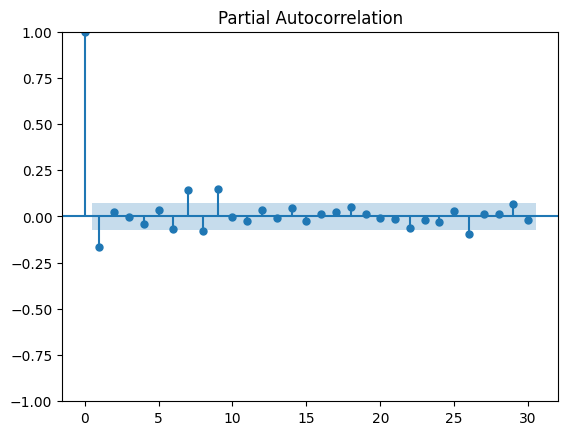

In [12]:
pacf = plot_pacf(train_table['log_return'].dropna(), lags=30)

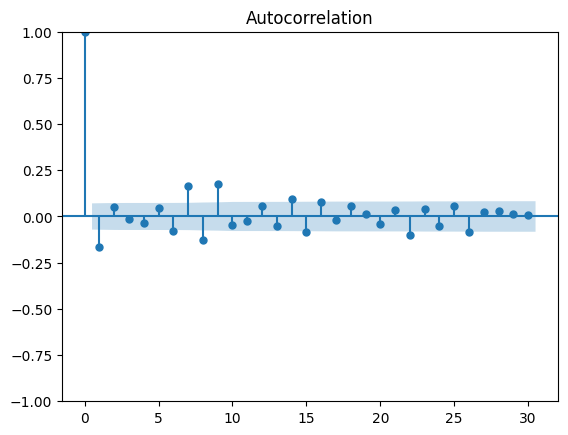

In [13]:
pacf = plot_acf(train_table['log_return'].dropna(), lags=30)

In [14]:
arima_order=(10, 0, 10)
arima_column = 'log_return'

In [15]:
plx.line(
    data_frame=test_table.reset_index(),
    title='Earnings Yield Ajustado - Escala Logarítmica',
    x='date',
    y=arima_column,
    height=720,
    width=1280,
)

/home/pedro/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [16]:
model = ARIMA(train_table[arima_column], order=arima_order)
results = model.fit()
results.summary()

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertib

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             log_return   No. Observations:                  761
Model:               ARIMA(10, 0, 10)   Log Likelihood                1851.714
Date:                Wed, 16 Oct 2024   AIC                          -3659.428
Time:                        15:59:51   BIC                          -3557.466
Sample:                             0   HQIC                         -3620.167
                                - 761                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.001      1.448      0.148      -0.000       0.003
ar.L1         -0.0260      5.476     -0.005      0.996     -10.759      10.707
ar.L2         -0.0482      1.608     -0.030      0.976      -3.200       3.103
ar.L3          0.0558      0.848      0.066      0.948      -1.606       1.717
ar.L4         -0.0642      0.305     -0.210      0.833      -0.662       0.534
ar.L5          0.1012      0.461      0.220      0.826      -0.802       1.005
ar.L6         -0.0863      0.519     -0.166      0.868      -1.103       0.931
ar.L7          0.1470      0.518      0.284      0.777      -0.868       1.162
ar.L8         -0.0599      0.827     -0.072      0.942      -1.682       1.562
ar.L9          0.1387      0.255      0.543      0.587      -0.362       0.639
ar.L10         0.0120      0.678      0.018      0.986      -1.318       1.342
ma.L1         -0.0932      5.477     -0.017      0.986     -10.827      10.641
ma.L2          0.0601      0.983      0.061      0.951      -1.867       1.987
ma.L3         -0.0631      0.747     -0.084      0.933      -1.528       1.401
ma.L4          0.0449      0.342      0.131      0.896      -0.625       0.715
ma.L5         -0.0883      0.367     -0.240      0.810      -0.808       0.631
ma.L6          0.0580      0.487      0.119      0.905      -0.896       1.012
ma.L7         -0.0256      0.398     -0.064      0.949      -0.805       0.754
ma.L8         -0.0104      0.312     -0.033      0.973      -0.622       0.601
ma.L9          0.0297      0.274      0.108      0.914      -0.508       0.568
ma.L10        -0.0498      0.335     -0.149      0.882      -0.706       0.607
sigma2         0.0005   1.64e-05     27.479      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               469.52
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
train_table['predictions'] = pd.Series(results.predict()).shift(-1)
train_table.dropna(inplace=True)
r2_score(train_table[arima_column], train_table['predictions'])

-0.3956131202109201

In [18]:
train_table['random_walk'] = train_table[arima_column].shift()

In [19]:
plx.line(
    data_frame=train_table[[arima_column, 'predictions', 'random_walk']].melt(ignore_index=False).reset_index(),
    title='Earnings Yield Ajustado - Escala Logarítmica',
    x='date',
    y='value',
    color='variable',
    height=720,
    width=1280,
)

/home/pedro/.local/lib/python3.10/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/pedro/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [20]:
for date in tqdm(test_table.index):
    forecast = results.forecast(1, index=[train_table.index[-1]])
    train_table.loc[date, 'forecast'] = forecast.iloc[0]
    try:
        train_table.loc[date, arima_column] = test_table.loc[forecast.index[0], arima_column]
    except KeyError:
        train_table.loc[date, arima_column] = np.nan
    results = ARIMA(train_table[arima_column], order=arima_order).fit()

  0%|          | 0/208 [00:00<?, ?it/s]

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertib

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive p

In [21]:
train_table['forecast'] = train_table['forecast'].shift(-1)
test_table['forecast'] = train_table['forecast']

In [22]:
plx.line(
    data_frame=train_table[[arima_column, 'predictions', 'forecast']].melt(ignore_index=False).reset_index(),
    x='date',
    y='value',
    color='variable',
    height=720,
    width=1280,
)

/home/pedro/.local/lib/python3.10/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/pedro/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [23]:
test_table['predicted_close'] = test_table['eps_moving_sum'] / (np.exp(test_table['forecast'].shift(-1)) - 1)
test_table['random_walk'] = np.exp(test_table['log_close'].shift())
test_table['actual_close'] = np.exp(test_table['log_close'])

In [24]:
#train_table = train_table[~train_table['log_adj_ey_ms'].isna()]

In [25]:
plx.line(
    data_frame=test_table[['actual_close', 'predicted_close', 'random_walk']].melt(ignore_index=False).reset_index(),
    x='date',
    y='value',
    color='variable',
    height=720,
    width=1280,
)

/home/pedro/.local/lib/python3.10/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/pedro/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [26]:
import av_api as av
import json
import os

In [27]:
ALPHA_VANTAGE_KEY = os.environ['ALPHA_VANTAGE_KEY']

In [28]:
api = av.AlphaVantage(ALPHA_VANTAGE_KEY)

In [29]:
av_response = api.get_earnings(symbol='AAPL')

Fetching data from: https://alphavantage.co/query?function=EARNINGS&apikey=SAZA656ZEYCFD7F6&symbol=AAPL
Fetching successful!


In [30]:
aapl_earnings = json.loads(av_response)

In [31]:
aapl_earnings = pd.DataFrame(aapl_earnings['quarterlyEarnings'])

In [32]:
aapl_earnings.columns = ['period_end', 'date', 'eps', 'estimated_eps', 'surprise', 'surprise_pct', 'report_time']

In [33]:
aapl_earnings.set_index('date', inplace=True)

In [34]:
aapl_earnings.sort_index(inplace=True)

In [35]:
aapl_earnings['eps_ms'] = aapl_earnings['eps'].rolling(4).sum()

In [36]:
aapl_earnings.to_parquet('data/alpha_vantage/aapl_earnings.parquet')

# RERUN FROM HERE

In [37]:
aapl_earnings = pd.read_parquet('data/alpha_vantage/aapl_earnings.parquet')

In [38]:
prices = pd.read_parquet('data/stooq/daily/us/all_stocks_processed.parquet')

In [39]:
prices.columns = [col[1:-1].lower() for col in prices.columns]

In [40]:
aapl_earnings.index = pd.to_datetime(aapl_earnings.index)

In [41]:
prices.set_index('date', inplace=True)

In [42]:
prices = prices[ prices['ticker'] == 'AAPL.US' ]

In [43]:
prices = prices.merge(aapl_earnings, 'outer', left_index=True, right_index=True)

In [44]:
prices['eps_ms'] = prices['eps_ms'].ffill(limit=65)

In [45]:
final_df = prices[['close', 'log_close', 'eps_ms']].dropna()

In [46]:
final_df['log_adj_ey'] = np.log(1 + final_df['eps_ms']/final_df['close'].shift())

/home/pedro/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



In [47]:
final_df.replace([-np.inf, np.inf], np.nan, inplace=True)
final_df.dropna(inplace=True)

In [48]:
final_df = final_df[ final_df.index >= datetime(2006, 10, 1) ]

In [49]:
model = ARIMA(final_df['log_adj_ey'], order=(1,1,30)).fit()
model.summary()

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/home/pedro/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             log_adj_ey   No. Observations:                 4438
Model:                ARIMA(1, 1, 30)   Log Likelihood               23294.865
Date:                Wed, 16 Oct 2024   AIC                         -46525.730
Time:                        16:20:08   BIC                         -46321.003
Sample:                             0   HQIC                        -46453.540
                               - 4438                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1048      0.005     19.346      0.000       0.094       0.115
ma.L1         -0.1174      0.005    -21.950      0.000      -0.128      -0.107
ma.L2         -0.0567      0.009     -6.238      0.000      -0.074      -0.039
ma.L3         -0.0126      0.012     -1.077      0.281      -0.036       0.010
ma.L4          0.0217      0.012      1.739      0.082      -0.003       0.046
ma.L5         -0.0061      0.012     -0.521      0.603      -0.029       0.017
ma.L6         -0.0128      0.012     -1.074      0.283      -0.036       0.011
ma.L7          0.0216      0.012      1.752      0.080      -0.003       0.046
ma.L8         -0.0305      0.012     -2.535      0.011      -0.054      -0.007
ma.L9          0.0378      0.013      3.009      0.003       0.013       0.062
ma.L10        -0.0230      0.012     -1.922      0.055      -0.046       0.000
ma.L11        -0.0194      0.013     -1.544      0.123      -0.044       0.005
ma.L12         0.0239      0.014      1.751      0.080      -0.003       0.051
ma.L13         0.0144      0.012      1.240      0.215      -0.008       0.037
ma.L14         0.0133      0.014      0.944      0.345      -0.014       0.041
ma.L15        -0.0374      0.012     -3.077      0.002      -0.061      -0.014
ma.L16         0.0334      0.012      2.735      0.006       0.009       0.057
ma.L17         0.0079      0.013      0.620      0.535      -0.017       0.033
ma.L18        -0.0136      0.013     -1.068      0.286      -0.039       0.011
ma.L19         0.0033      0.015      0.222      0.824      -0.026       0.032
ma.L20        -0.0011      0.013     -0.085      0.932      -0.026       0.024
ma.L21        -0.0027      0.013     -0.198      0.843      -0.029       0.024
ma.L22        -0.0390      0.015     -2.662      0.008      -0.068      -0.010
ma.L23         0.0157      0.013      1.203      0.229      -0.010       0.041
ma.L24         0.0120      0.014      0.883      0.378      -0.015       0.039
ma.L25         0.0193      0.014      1.387      0.165      -0.008       0.046
ma.L26         0.0091      0.013      0.715      0.474      -0.016       0.034
ma.L27        -0.0130      0.014     -0.925      0.355      -0.040       0.015
ma.L28         0.0198      0.014      1.462      0.144      -0.007       0.046
ma.L29        -0.0188      0.014     -1.387      0.165      -0.045       0.008
ma.L30         0.0147      0.015      1.009      0.313      -0.014       0.043
sigma2        1.6e-06   1.11e-08    144.132      0.000    1.58e-06    1.62e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             97476.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.57
========================================================

In [50]:
final_df['predictions'] = pd.Series(model.predict())

In [51]:
final_df['predictions'] = final_df['predictions'].shift(-1)

In [52]:
final_df['pred_close'] = final_df['eps_ms'] / (np.exp( final_df['predictions'] ) - 1)

In [53]:
final_df['return'] = final_df['close'] / final_df['close'].shift()
final_df['pred_return'] = final_df['pred_close'] / final_df['close'].shift()

In [54]:
final_df.replace([-np.inf, np.inf], np.nan, inplace=True)
final_df.dropna(inplace=True)

In [55]:
r2_score(final_df['return'], final_df['pred_return'])

0.0032660691566493982

In [56]:
plx.line(
    data_frame=final_df[['return', 'pred_return']].melt(ignore_index=False).reset_index(),
    x='date',
    y='value',
    color='variable',
    height=720,
    width=1280,
    log_y=True
)

/home/pedro/.local/lib/python3.10/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/pedro/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

